In [1]:
import sys

sys.path.append('../../DeepCell/')

In [2]:
project_name = 'ophys-experts-slc-oct-2020_ophys-experts-go-big-or-go-home'
manifest_path = 's3://prod.slapp.alleninstitute.org/behavior_slc_oct_2020_behavior_3cre_1600roi_merged/output.manifest'

In [6]:
from RoiDataset import RoiDataset
from DataSplitter import DataSplitter
from eda import display_roi
import numpy as np

In [23]:
data_splitter = DataSplitter(manifest_path=manifest_path, project_name=project_name, data_dir='../data',
                            cre_line='Slc')
slc_train, _ = data_splitter.get_train_test_split(test_size=.3)

data_splitter = DataSplitter(manifest_path=manifest_path, project_name=project_name, data_dir='../data',
                            cre_line='Vip')
Vip_train, _ = data_splitter.get_train_test_split(test_size=.3)

data_splitter = DataSplitter(manifest_path=manifest_path, project_name=project_name, data_dir='../data',
                            cre_line='Sst')
Sst_train, _ = data_splitter.get_train_test_split(test_size=.3)

In [27]:
def display_roi_ids(train):
    train.roi_ids = np.array(train.roi_ids)
    roi_ids = np.random.choice(train.roi_ids, 10)
    for roi_id in roi_ids:
        idx = np.where(train.roi_ids == roi_id)[0][0]
        label = train.y[idx]
        channels = train._extract_channels(obs={'roi-id': roi_id})
        label = 'Cell' if label == 1 else 'Not Cell'
        display_roi(channels=channels, roi_id=roi_id, 
                    columns=3, rows=1, label=label)

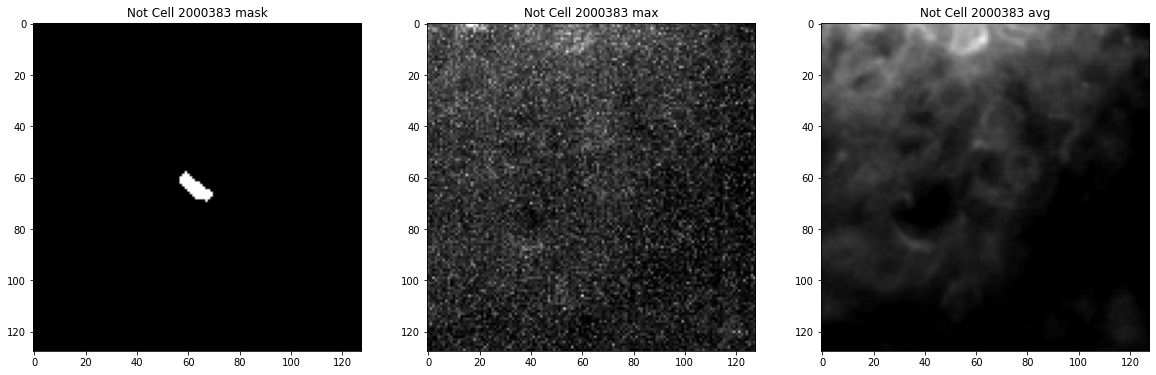

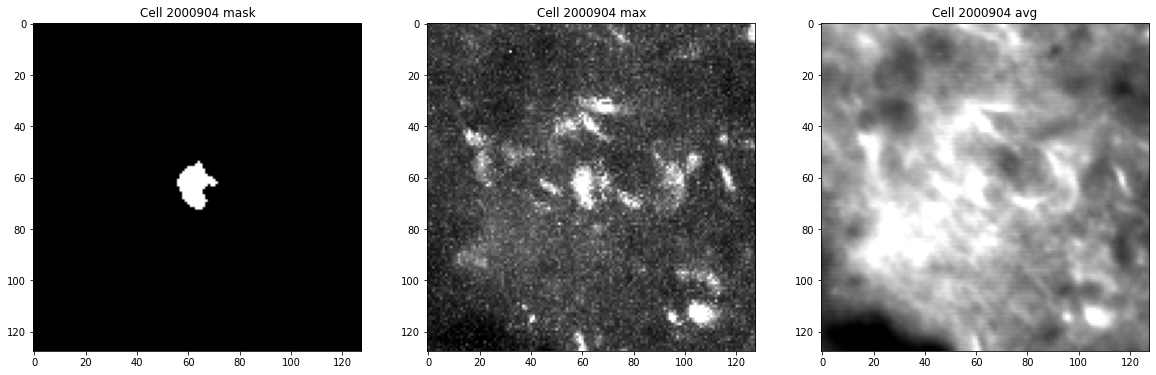

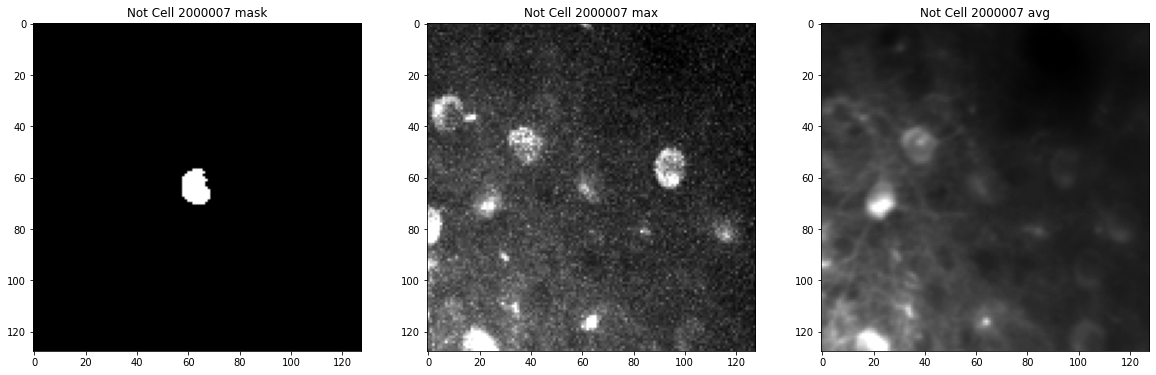

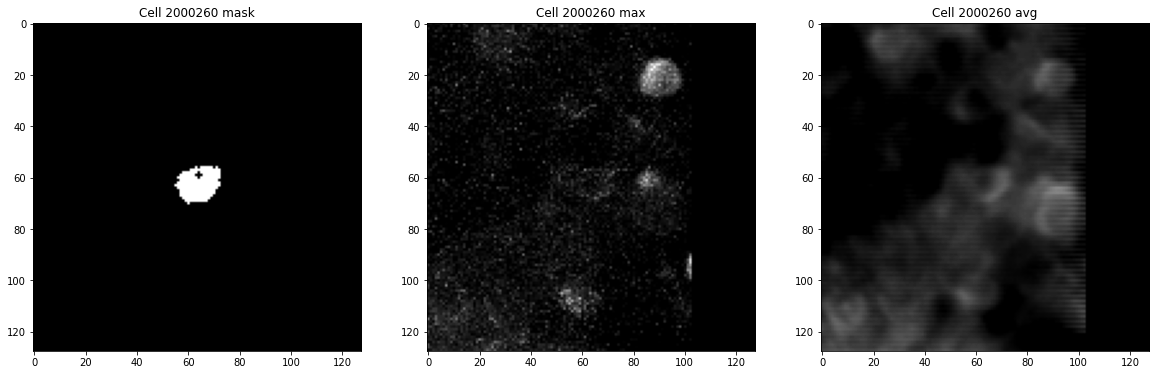

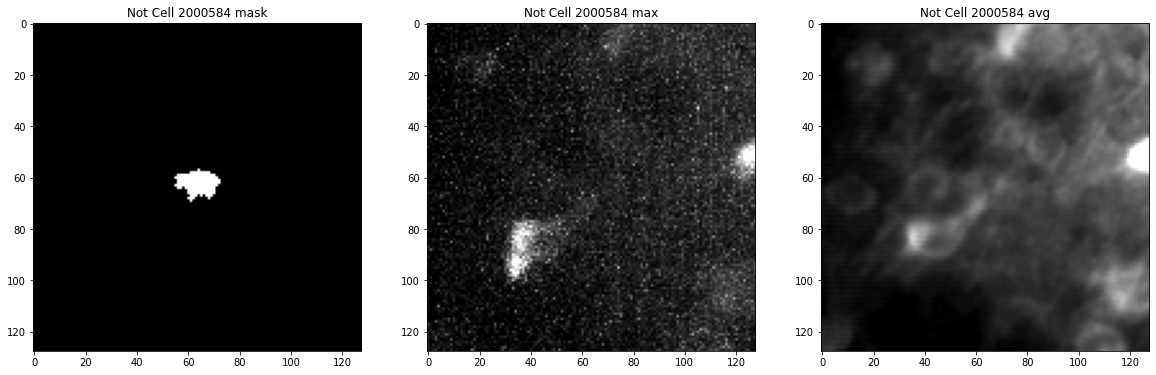

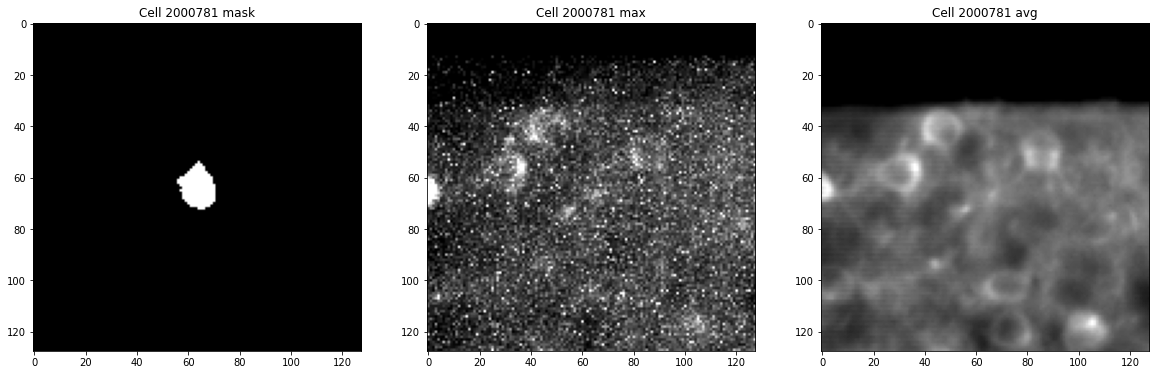

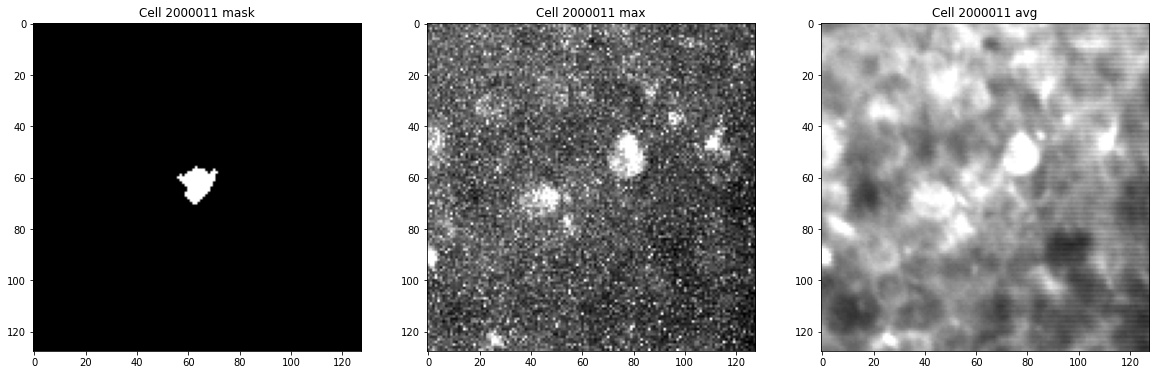

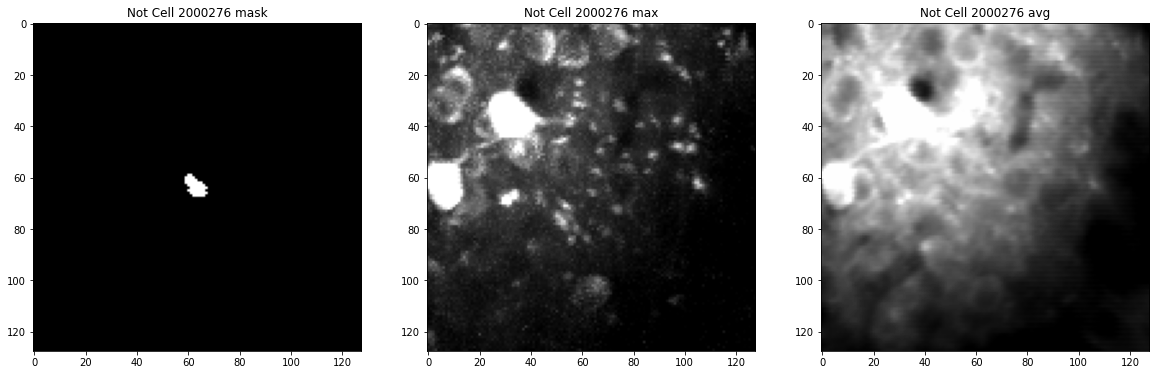

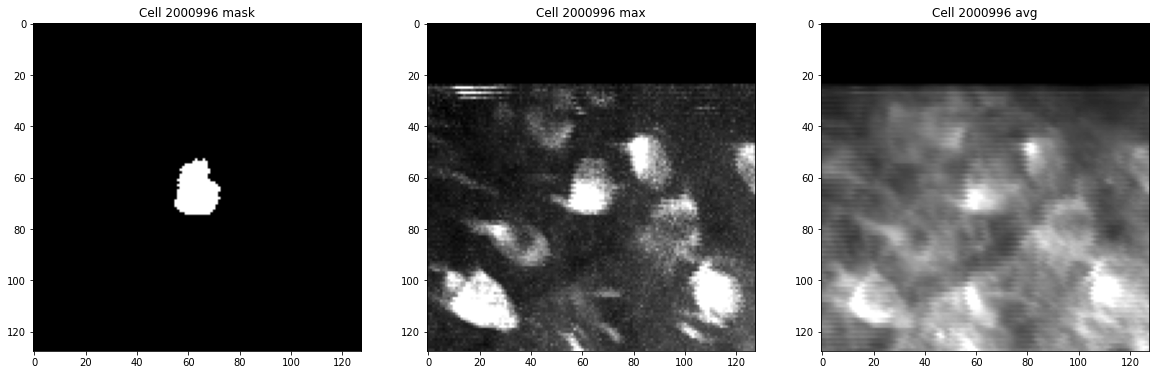

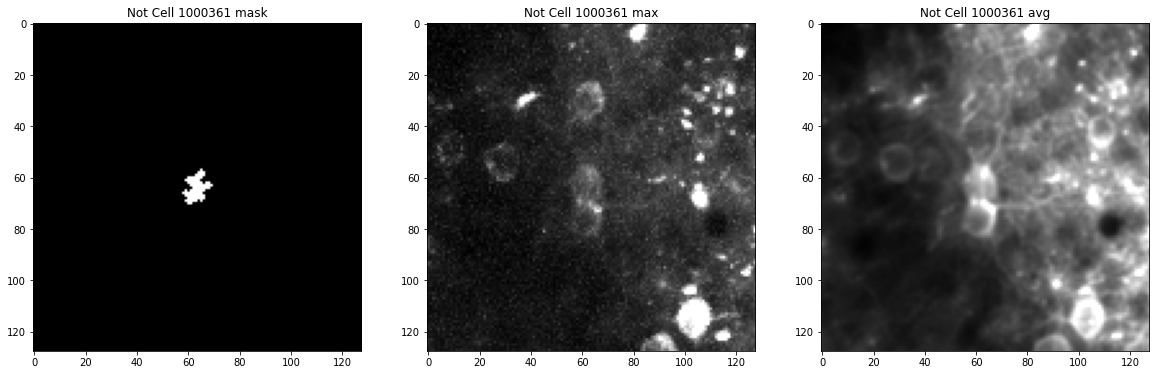

In [24]:
display_roi_ids(slc_train)

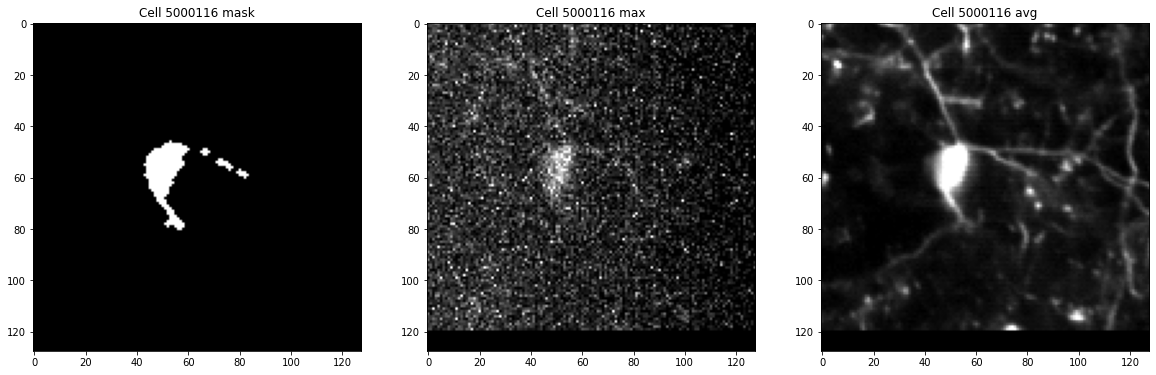

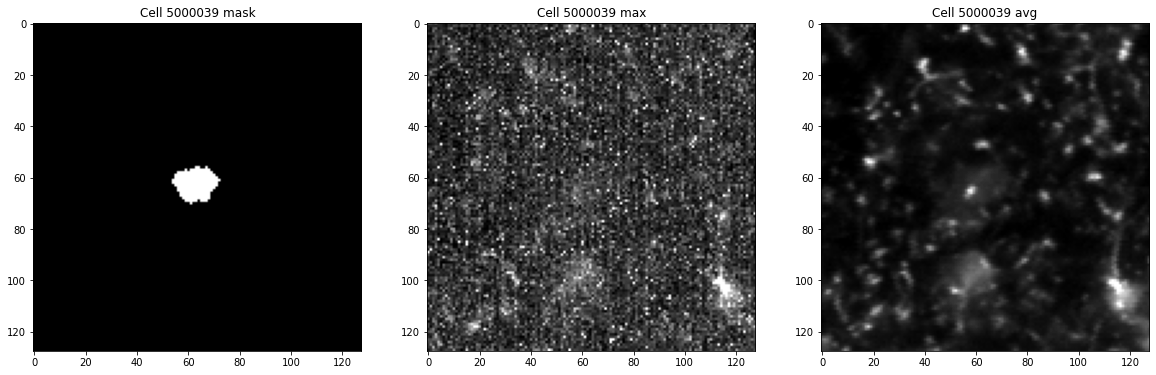

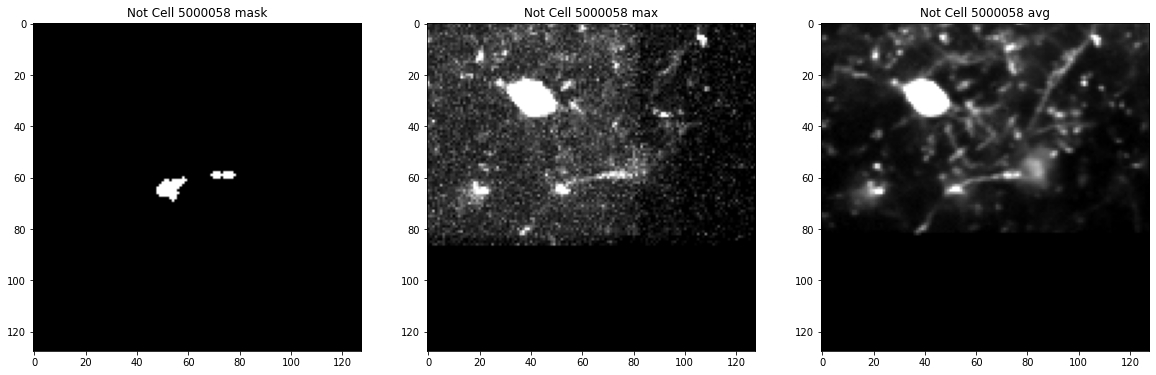

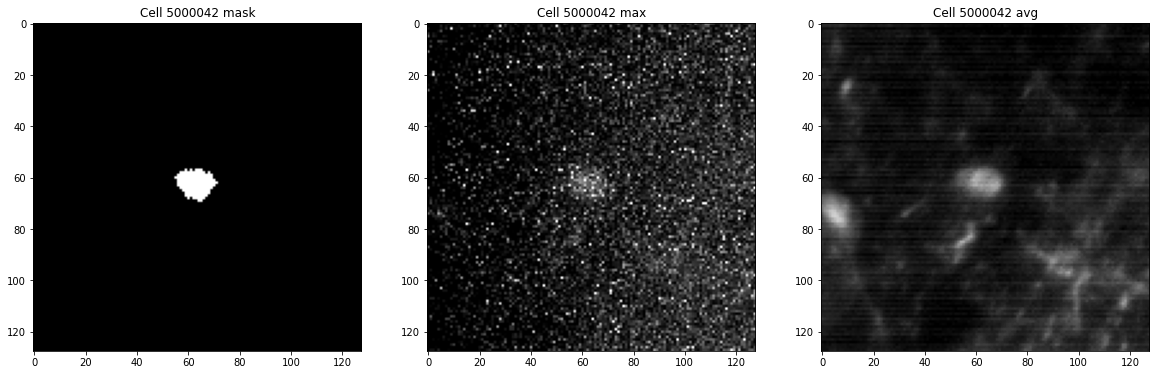

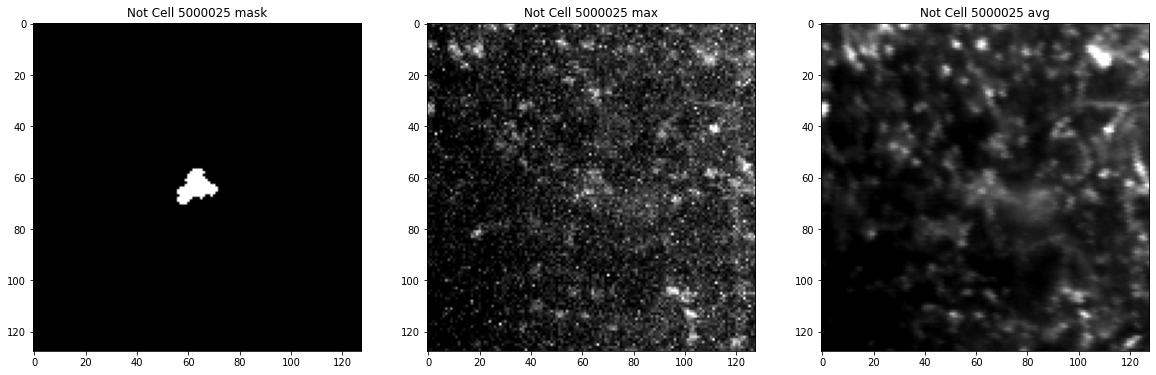

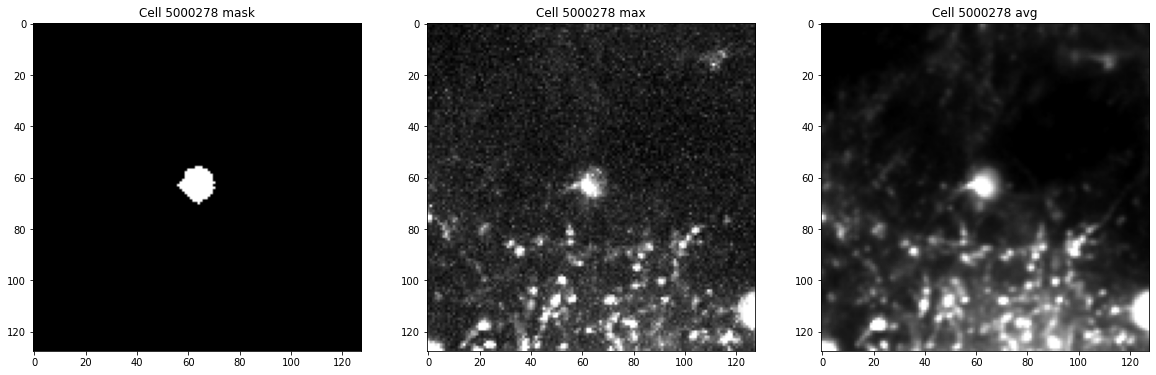

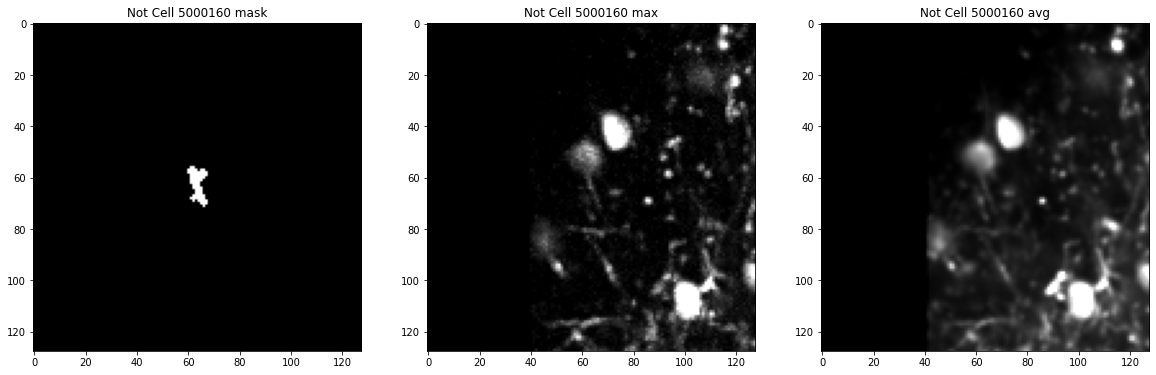

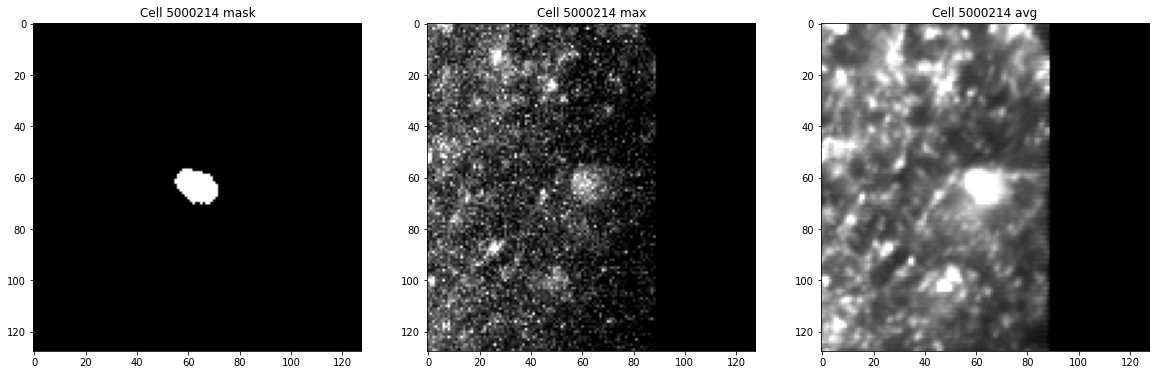

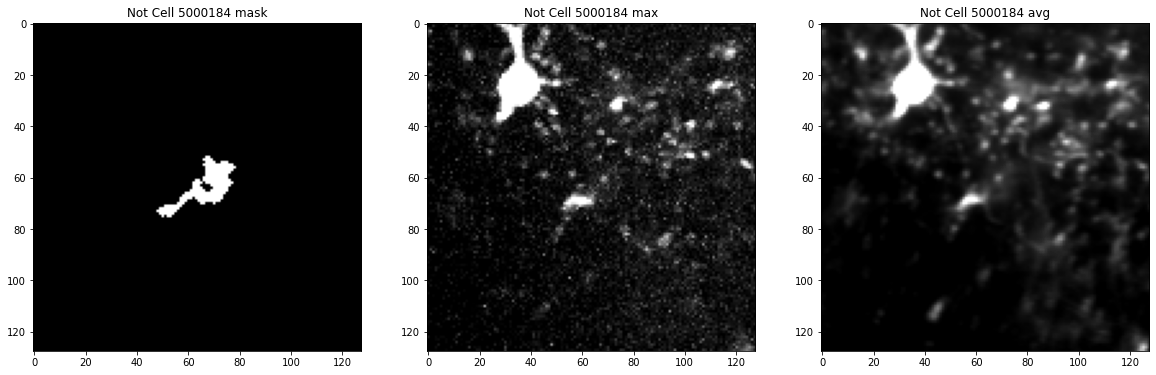

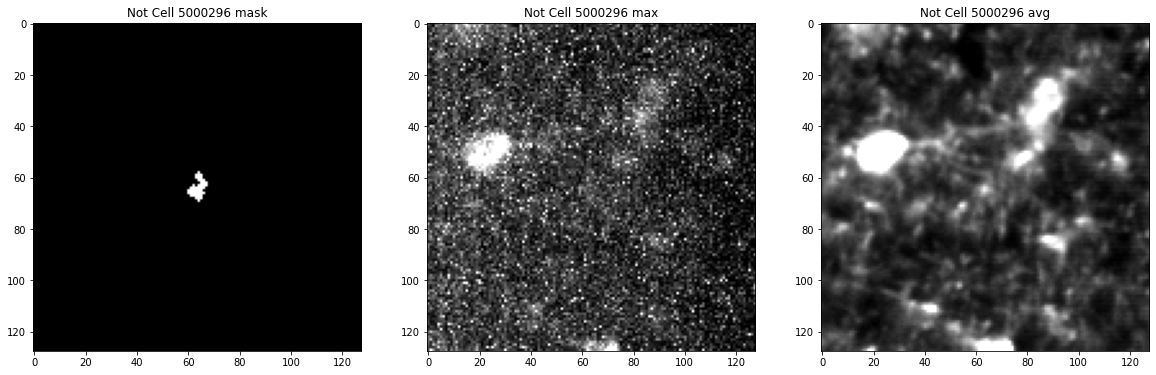

In [30]:
display_roi_ids(Vip_train)

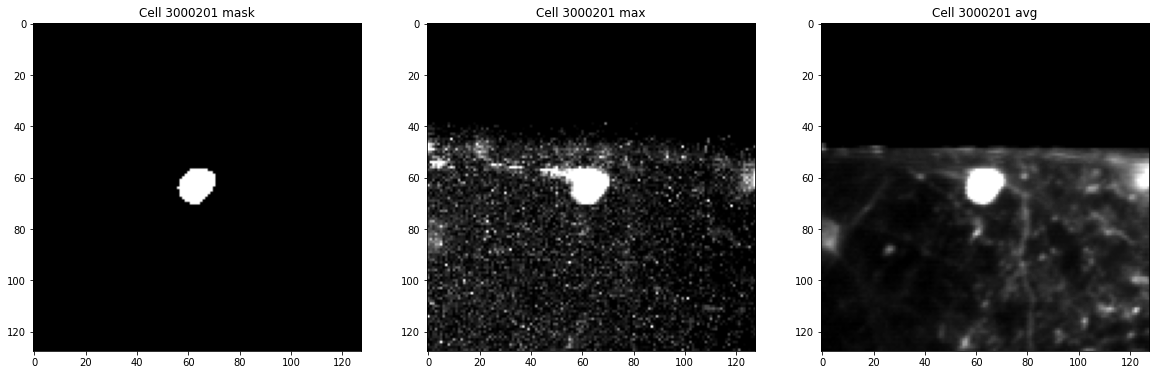

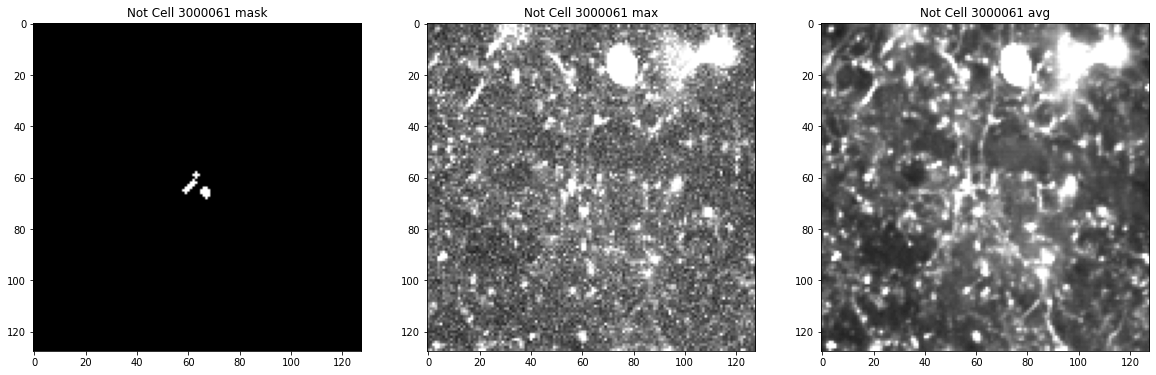

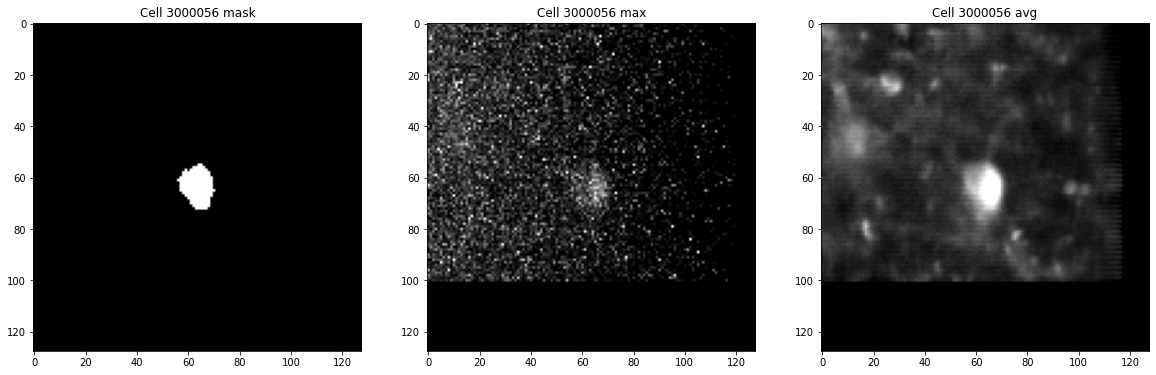

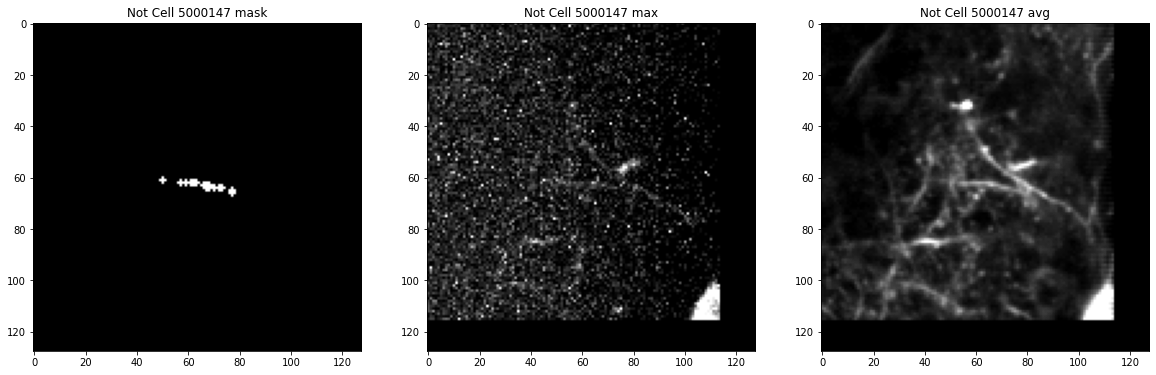

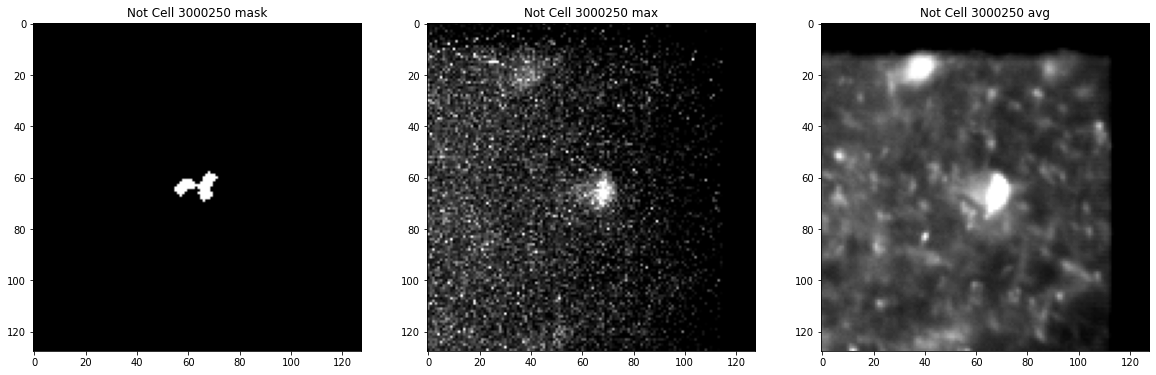

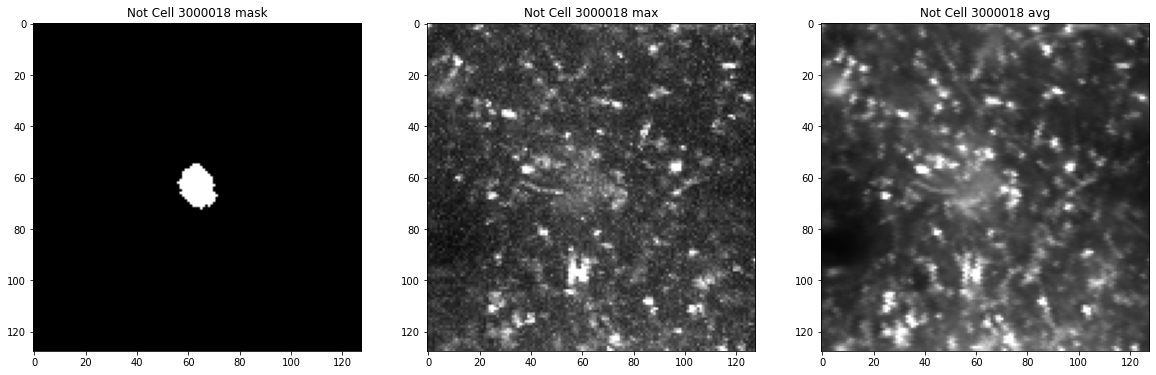

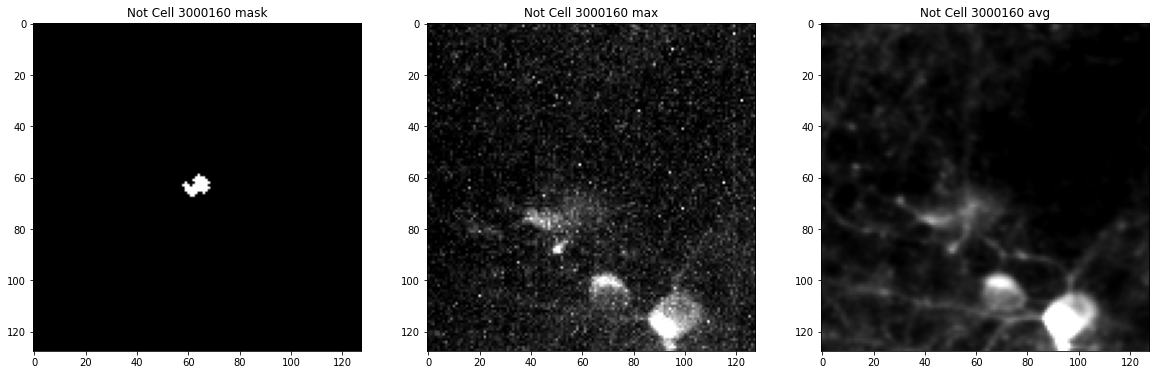

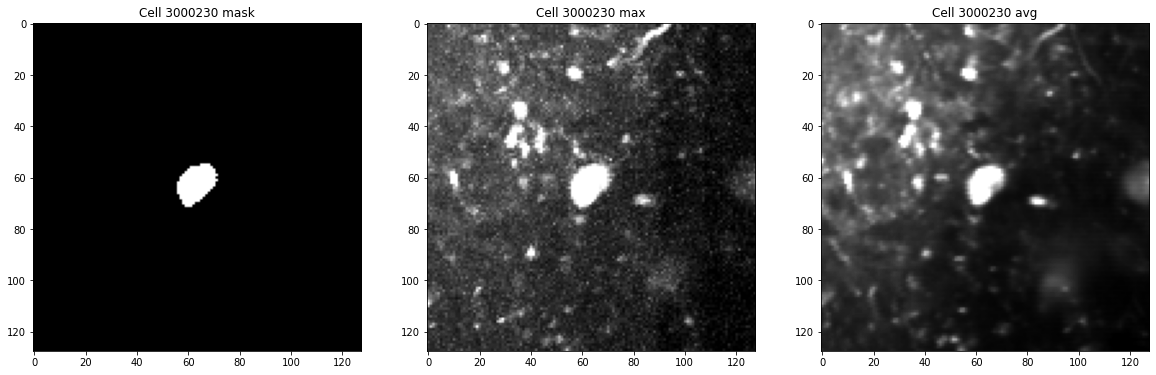

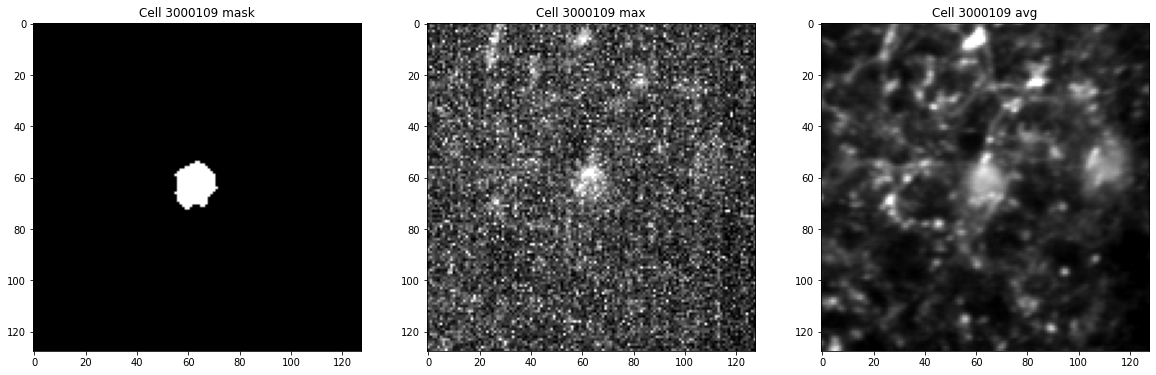

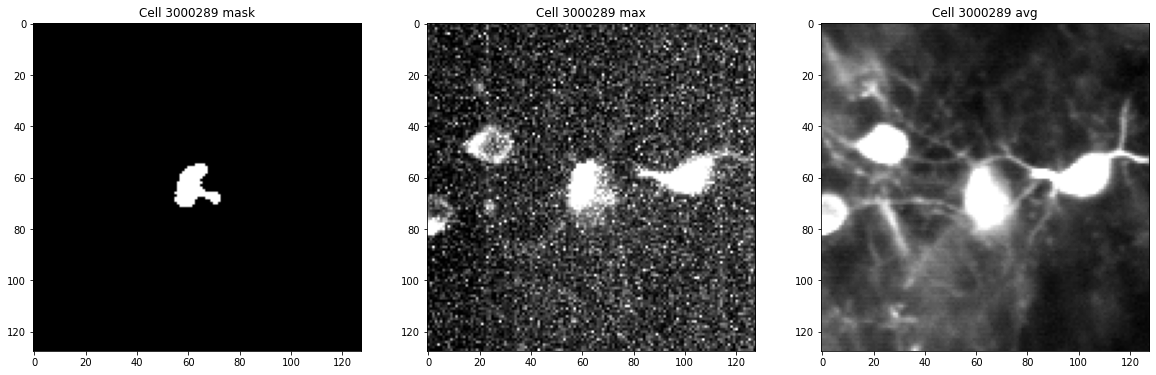

In [31]:
display_roi_ids(Sst_train)